In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [253]:
##This will store the .csv file under the new file name data.
data = pd.read_csv('Student_Data_IQ_CGPA.csv')
data['Class'].astype(int)
data['iq'].astype(int)
#These Addition documents are used to store values for the K-Means
trainingdata = pd.read_csv('TrainingDataSet.csv')
testingdata = pd.read_csv('TestingDataSet.csv')
data 

,cgpa,iq,Class
0,5.13,88,2
1,5.90,113,8
2,8.36,93,3
3,8.27,97,4
4,5.45,110,8
...,...,...,...
195,4.68,89,2
196,8.57,118,10
197,5.85,112,8
198,6.23,108,7


In [156]:
##iq_Class is the name of the array which will contain the Class Rank of the IQs. This is to verify if iq_Class contains the
##right information and content.
iq_Class = data['Class']
iq_Class.head()
iq_Class.shape

(200,)

In [157]:
##cgpa is the name of the array which will contain the cgpa of the students. This is to verify if cgpa contains the
##right information and content.
cgpa = data['cgpa']
cgpa.head()

0    5.13
1    5.90
2    8.36
3    8.27
4    5.45
Name: cgpa, dtype: float64

In [159]:
##The data is split into training data (contains 75% of the data or 150 students) and 
##testing data (contains 25% of the data or 50 students)
X_train, X_test, y_train, y_test = train_test_split(data[['cgpa']],data['Class'], test_size=0.25)
X_train

,cgpa
78,5.15
52,8.79
65,8.75
83,4.90
181,5.97
...,...
115,8.89
170,9.06
163,8.33
31,6.01


In [160]:
##Display y_train to see values.
y_train

78      2
52      9
65      8
83      1
181     7
       ..
115    10
170    10
163     3
31      8
11      8
Name: Class, Length: 150, dtype: int64

In [161]:
## Import and create the logistic Regression Model
from sklearn import linear_model
mymodel = linear_model.LogisticRegression(max_iter=2000)

mymodel.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [162]:
mymodel.predict(X_test)

array([9, 4, 2, 2, 8, 8, 4, 8, 8, 9, 2, 2, 9, 2, 4, 2, 9, 4, 4, 4, 4, 2,
       8, 8, 9, 8, 4, 4, 9, 4, 2, 8, 2, 2, 8, 4, 8, 2, 8, 4, 4, 9, 4, 2,
       2, 2, 9, 2, 9, 4], dtype=int64)

In [163]:
#The Accuracy is 58%
mymodel.score(X_test, y_test)

0.58

In [164]:
predicted_output = mymodel.predict(X_test)
predicted_output

array([9, 4, 2, 2, 8, 8, 4, 8, 8, 9, 2, 2, 9, 2, 4, 2, 9, 4, 4, 4, 4, 2,
       8, 8, 9, 8, 4, 4, 9, 4, 2, 8, 2, 2, 8, 4, 8, 2, 8, 4, 4, 9, 4, 2,
       2, 2, 9, 2, 9, 4], dtype=int64)

In [165]:
##A Confusion Matrix is formed.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  4,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  8,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  3,  0]], dtype=int64)

Text(24.0, 0.5, 'Truth or Actual Value')

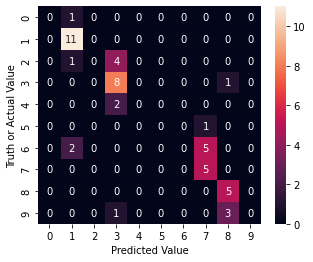

In [166]:
##Confusion Matrix with heat map.
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

intercept: 73.91557510547918
slope: [4.07540257]


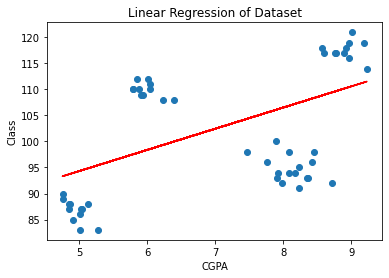

23.82761003356608 %


In [290]:
##The Package to create the linear model is imported.
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg=LinearRegression()
linreg.fit(X_train,y_train)


y_predict=linreg.predict(X_test)
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,color="red")
plt.title("Linear Regression of Dataset")
plt.xlabel("CGPA")
plt.ylabel("Class")
plt.show()

r2_score=linreg.score(X_test,y_test)
print(r2_score*100,'%')

intercept: 73.91557510547918
slope: [4.07540257]


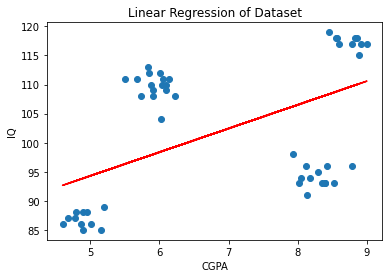

13.53434117336052 %


In [293]:
##The Y-value is changed to see whether the IQ will produce a better match with cgpa opposed to categories.
X_train, X_test, y_train, y_test = train_test_split(data[['cgpa']],data['iq'], test_size=0.25)
y_predict=linreg.predict(X_test)
print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

plt.scatter(X_test,y_test)
plt.plot(X_test,y_predict,color="red")
plt.title("Linear Regression of Dataset")
plt.xlabel("CGPA")
plt.ylabel("IQ")
plt.show()

r2_score=linreg.score(X_test,y_test)
print(r2_score*100,'%')

Text(0, 0.5, 'IQ')

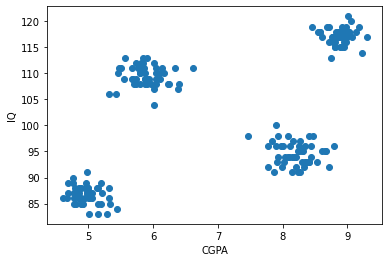

In [132]:
##We notice a trend and plot all the data points as a scatter plot. We see 4 distinct clusters.
plt.scatter(data['cgpa'],data['iq'])
plt.xlabel('CGPA')
plt.ylabel('IQ')

In [284]:
## We investigate the K-Means more. We use K=4.
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
kmm = KMeans(n_clusters=4)

In [255]:
km = KMeans(n_clusters=4)

X_train, X_test, y_train, y_test = train_test_split(data[['cgpa']],data['iq'], test_size=0.25)
X_train

,cgpa
86,9.00
36,8.56
21,4.86
199,8.82
122,8.40
...,...
5,5.88
103,8.91
17,7.87
24,4.96


In [256]:
y_train

86     117
36     118
21      86
199    117
122     93
      ... 
5      109
103    119
17      91
24      88
56     111
Name: iq, Length: 150, dtype: int64

In [257]:
y_test

197    112
171    110
91     114
34      96
107     90
158    110
135    118
2       93
72      94
95      94
18     111
186     93
152    117
73      83
159     93
41      96
0       88
31     112
128     87
172    117
161    119
162    108
79      92
88     117
136    109
132     83
26      87
149     88
106     92
143     87
160     86
187     91
8      110
126     98
155     95
84     116
173     88
67      85
81     121
196    118
100    110
9       94
20      98
150    117
138    100
192     89
112    109
175     98
47     108
27     119
Name: iq, dtype: int64

In [259]:
##We Store the training data in trainingdata.csv
trainingdata = trainingdata.dropna(axis=1)
trainingdata['cgpa'] = X_train
trainingdata['iq']= y_train
trainingdata.head()


,cgpa,iq
86,9.00,117
36,8.56,118
21,4.86,86
199,8.82,117
122,8.40,93


In [260]:

y_predicted = km.fit_predict(trainingdata[['cgpa','iq']])
y_predicted

array([0, 0, 1, 0, 2, 3, 3, 0, 2, 0, 3, 1, 3, 3, 2, 2, 0, 2, 1, 1, 1, 0,
       0, 2, 2, 0, 2, 3, 0, 3, 2, 2, 3, 2, 3, 2, 1, 1, 1, 3, 3, 2, 0, 1,
       2, 2, 1, 2, 3, 0, 2, 1, 1, 3, 1, 2, 2, 0, 0, 1, 3, 1, 3, 2, 3, 0,
       1, 2, 0, 0, 0, 1, 3, 1, 3, 1, 2, 3, 3, 3, 0, 0, 3, 1, 2, 0, 0, 1,
       0, 1, 0, 3, 3, 3, 2, 3, 0, 1, 0, 1, 3, 3, 2, 2, 0, 1, 3, 3, 2, 0,
       0, 2, 3, 1, 0, 1, 0, 3, 1, 1, 1, 3, 3, 0, 3, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 2, 2, 0, 2, 1, 1, 2, 1, 3, 2, 3, 3, 0, 2, 1, 3])

In [261]:
##We store the cluster to the trainingdata.csv
trainingdata['cluster']=y_predicted
trainingdata.head()

,cgpa,iq,cluster
86,9.00,117,0
36,8.56,118,0
21,4.86,86,1
199,8.82,117,0
122,8.40,93,2


In [262]:
##Here are the cluster centers.
km.cluster_centers_

array([[  8.86358974, 117.05128205],
       [  4.96973684,  86.68421053],
       [  8.23205882,  94.5       ],
       [  5.8674359 , 109.41025641]])

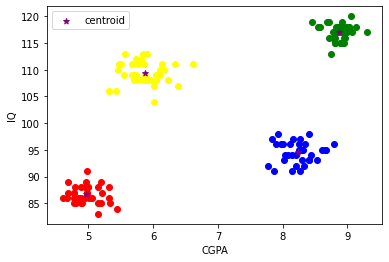

In [263]:
df1 = trainingdata[trainingdata.cluster==0]
df2 = trainingdata[trainingdata.cluster==1]
df3 = trainingdata[trainingdata.cluster==2]
df4 = trainingdata[trainingdata.cluster==3]

plt.scatter(df1['cgpa'],df1['iq'],color='green')
plt.scatter(df2['cgpa'],df2['iq'],color='red')
plt.scatter(df3['cgpa'],df3['iq'],color='blue')
plt.scatter(df4['cgpa'],df4['iq'],color='yellow')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()

In [278]:
##We print the min/max IQ and CGPA for each clusters.
print(df1["iq"].min(),df1["iq"].max(),df1["cgpa"].min(),df1["cgpa"].max())


113 120 8.45 9.3


In [279]:
print(df2["iq"].min(),df2["iq"].max(),df2["cgpa"].min(),df2["cgpa"].max())

83 91 4.6 5.44


In [280]:
print(df3["iq"].min(),df3["iq"].max(),df3["cgpa"].min(),df3["cgpa"].max())

91 98 7.78 8.79


In [281]:
print(df4["iq"].min(),df4["iq"].max(),df4["cgpa"].min(),df4["cgpa"].max())

104 113 5.32 6.61


In [265]:
##The Testing data is stored in its own .csv
testingdata = testingdata.dropna(axis=1)
testingdata['cgpa test'] = X_test
testingdata['iq test']= y_test
testingdata.head()

,cgpa test,iq test
197,5.85,112
171,5.80,110
91,9.23,114
34,7.77,96
107,4.76,90


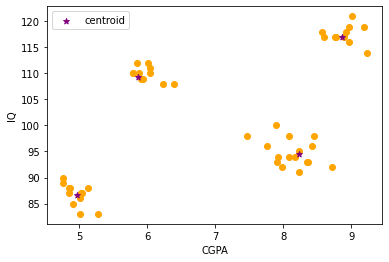

In [267]:
##We used the old centroid points and compared it to the testing data to see 4 distinct clusters.
plt.scatter(testingdata['cgpa test'],testingdata['iq test'],color='orange')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()

In [285]:
##We see the ceontroids for the testing data K-means.
y_prediction = kmm.fit_predict(testingdata[['cgpa test','iq test']])
y_prediction

array([2, 2, 0, 3, 1, 2, 0, 3, 3, 3, 2, 3, 0, 1, 3, 3, 1, 2, 1, 0, 0, 2,
       3, 0, 2, 1, 1, 1, 3, 1, 1, 3, 2, 3, 3, 0, 1, 1, 0, 0, 2, 3, 3, 0,
       3, 1, 2, 3, 2, 0])

In [286]:
kmm.cluster_centers_

array([[  8.89909091, 117.54545455],
       [  4.96083333,  86.75      ],
       [  5.99181818, 109.90909091],
       [  8.13125   ,  94.8125    ]])

In [287]:
testingdata['cluster']=y_prediction
testingdata.head()

,cgpa test,iq test,cluster
197,5.85,112,2
171,5.80,110,2
91,9.23,114,0
34,7.77,96,3
107,4.76,90,1


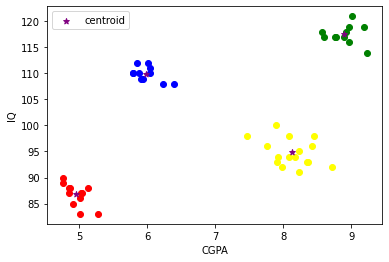

In [288]:
dff1 = testingdata[testingdata.cluster==0]
dff2 = testingdata[testingdata.cluster==1]
dff3 = testingdata[testingdata.cluster==2]
dff4 = testingdata[testingdata.cluster==3]

plt.scatter(dff1['cgpa test'],dff1['iq test'],color='green')
plt.scatter(dff2['cgpa test'],dff2['iq test'],color='red')
plt.scatter(dff3['cgpa test'],dff3['iq test'],color='blue')
plt.scatter(dff4['cgpa test'],dff4['iq test'],color='yellow')

plt.scatter(kmm.cluster_centers_[:,0],kmm.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.legend()